In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff


In [2]:
#read data
data = arff.loadarff('../input/breast-cancer.arff')
df = pd.DataFrame(data[0])

In [3]:
#show data
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,"b""'40-49'""","b""'premeno'""","b""'15-19'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_up'""","b""'no'""","b""'recurrence-events'"""
1,"b""'50-59'""","b""'ge40'""","b""'15-19'""","b""'0-2'""","b""'no'""","b""'1'""","b""'right'""","b""'central'""","b""'no'""","b""'no-recurrence-events'"""
2,"b""'50-59'""","b""'ge40'""","b""'35-39'""","b""'0-2'""","b""'no'""","b""'2'""","b""'left'""","b""'left_low'""","b""'no'""","b""'recurrence-events'"""
3,"b""'40-49'""","b""'premeno'""","b""'35-39'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_low'""","b""'yes'""","b""'no-recurrence-events'"""
4,"b""'40-49'""","b""'premeno'""","b""'30-34'""","b""'3-5'""","b""'yes'""","b""'2'""","b""'left'""","b""'right_up'""","b""'no'""","b""'recurrence-events'"""


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null object
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
Class          286 non-null object
dtypes: object(10)
memory usage: 22.4+ KB


In [5]:
#delate the '?' entries
df = df[~ df['node-caps'].isin([b'?'])]
df = df[~ df['breast-quad'].isin([b'?'])]

In [6]:
y=df['Class']
X=df.drop('Class',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 9 columns):
age            277 non-null object
menopause      277 non-null object
tumor-size     277 non-null object
inv-nodes      277 non-null object
node-caps      277 non-null object
deg-malig      277 non-null object
breast         277 non-null object
breast-quad    277 non-null object
irradiat       277 non-null object
dtypes: object(9)
memory usage: 21.6+ KB


In [7]:
#one-hot encoding
X=pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 41 columns):
age_b"'20-29'"                277 non-null uint8
age_b"'30-39'"                277 non-null uint8
age_b"'40-49'"                277 non-null uint8
age_b"'50-59'"                277 non-null uint8
age_b"'60-69'"                277 non-null uint8
age_b"'70-79'"                277 non-null uint8
menopause_b"'ge40'"           277 non-null uint8
menopause_b"'lt40'"           277 non-null uint8
menopause_b"'premeno'"        277 non-null uint8
tumor-size_b"'0-4'"           277 non-null uint8
tumor-size_b"'10-14'"         277 non-null uint8
tumor-size_b"'15-19'"         277 non-null uint8
tumor-size_b"'20-24'"         277 non-null uint8
tumor-size_b"'25-29'"         277 non-null uint8
tumor-size_b"'30-34'"         277 non-null uint8
tumor-size_b"'35-39'"         277 non-null uint8
tumor-size_b"'40-44'"         277 non-null uint8
tumor-size_b"'45-49'"         277 non-null uint8
tumor-size_b"

In [8]:
from sklearn.model_selection import train_test_split
#split the train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

class_mapping = {b"'no-recurrence-events'":0, b"'recurrence-events'":1}
y_test=y_test.map(class_mapping)
y_train=y_train.map(class_mapping)

In [9]:
from sklearn import tree
#make decision tree
dt = tree.DecisionTreeClassifier(criterion="gini",max_depth=5)
#train it
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6857142857142857

In [10]:
#get the predict result
pred_result = dt.predict(X_test)
print(pred_result)

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1]


In [11]:
from sklearn.metrics import confusion_matrix
#make confusion matrix
confusion_matrix(y_test,pred_result)

array([[38,  9],
       [13, 10]])

In [12]:
from sklearn.metrics import roc_curve
#calucate and draw ROC curve
proba = dt.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])

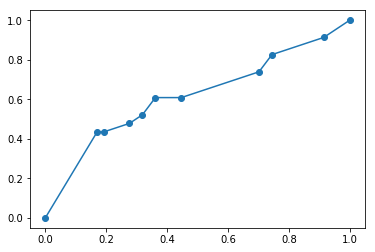

In [13]:
plt.plot(fpr,tpr,marker = 'o')
plt.show()

In [14]:
from sklearn.metrics import auc

AUC = auc(fpr, tpr)
print(AUC)

0.6170212765957448


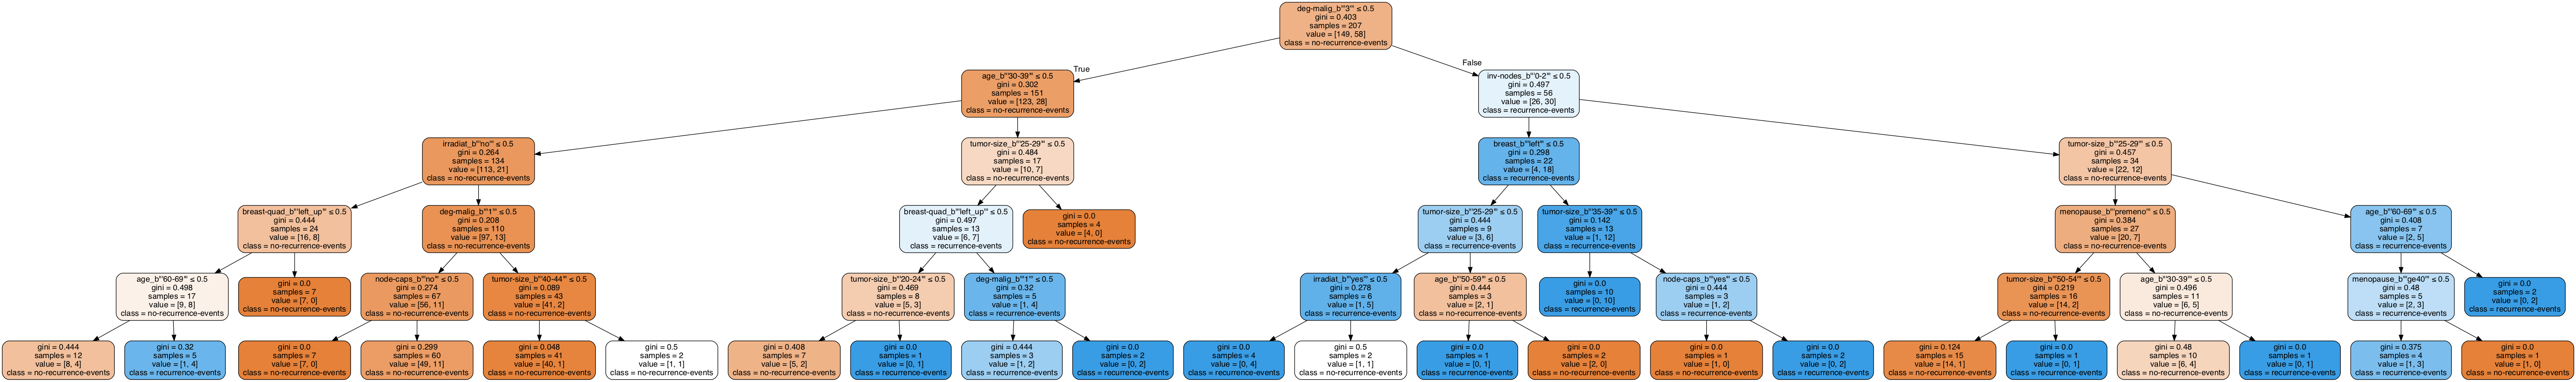

In [15]:
from IPython.display import Image 
import pydotplus
#draw the decision tree
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=X.columns.values.tolist(),
                         class_names=["no-recurrence-events","recurrence-events"],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# bayes

In [16]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
#apply naive bayes on the data
bayes1 = GaussianNB()
bayes1.fit(X_train, y_train)
bayes1.score(X_test, y_test)

0.4714285714285714

In [17]:
#get the predict result
pred_result1 = bayes1.predict(X_test)
confusion_matrix(y_test,pred_result1)

array([[11, 36],
       [ 1, 22]])

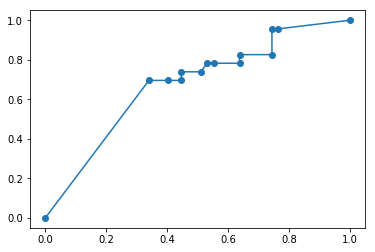

In [18]:
#calucate and draw the ROC curve
proba1 = bayes1.predict_proba(X_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, proba1[:, 1])

plt.plot(fpr1,tpr1,marker = 'o')
plt.show()

In [19]:
AUC1 = auc(fpr1, tpr1)
print(AUC1)

0.6762257169287696


In [20]:
#next is two other kinds of naive bayes, same as the first one
bayes2 = MultinomialNB()
bayes2.fit(X_train, y_train)
bayes2.score(X_test, y_test)

0.7714285714285715

In [21]:
pred_result2 = bayes2.predict(X_test)
confusion_matrix(y_test,pred_result2)

array([[38,  9],
       [ 7, 16]])

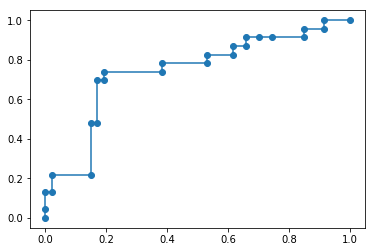

In [22]:
proba2 = bayes2.predict_proba(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, proba2[:, 1])

plt.plot(fpr2,tpr2,marker = 'o')
plt.show()

In [23]:
AUC2 = auc(fpr2, tpr2)

print(AUC2)

0.7419056429232193


In [24]:
bayes3 = BernoulliNB()
bayes3.fit(X_train, y_train)
bayes3.score(X_test, y_test)

0.7714285714285715

In [25]:
pred_result3 = bayes3.predict(X_test)
confusion_matrix(y_test,pred_result3)

array([[37, 10],
       [ 6, 17]])

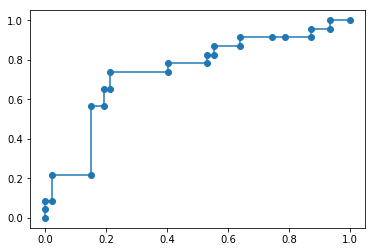

In [26]:
proba3 = bayes3.predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, proba3[:, 1])

plt.plot(fpr3,tpr3,marker = 'o')
plt.show()

In [27]:
AUC3 = auc(fpr3, tpr3)

print(AUC3)

0.7391304347826086
